#### Creates coherence triangle plots for VV and VH for single full res pixel

In [2]:
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#%matplotlib  widget

#### <span style="color:red"> Edit this cell for path, point of interest, and downlook dims</span>

In [ ]:
workdir = '/data/krd86/cropped/'

pixx = 5000 # r full res coord
pixy = 200 # a full res coord

alooks = 4 # number of azimuth looks
rlooks = 20 # number of range looks

#### Load in dates

In [3]:
dates = [os.path.basename(x) for x in glob.glob(workdir+"SLC_vv/2*")]
dates=sorted(dates)
nd=len(dates)


129 dates so far!


#### Create list of VV and VH SLCs

In [4]:
slcsvv=np.ndarray([len(dates),alooks,rlooks],'complex')
slcsvh=np.ndarray([len(dates),alooks,rlooks],'complex')

for i in np.arange(nd):
    ds = gdal.Open(workdir+"SLC_vv/"+dates[i]+"/"+dates[i]+".slc.full", gdal.GA_ReadOnly)
    slcsvv[i,:,:] = ds.GetRasterBand(1).ReadAsArray(pixx-rlooks/2,pixy-alooks/2,rlooks,alooks)

for i in np.arange(nd):
    ds = gdal.Open(workdir+"SLC_vh/"+dates[i]+"/"+dates[i]+".slc.full", gdal.GA_ReadOnly)
    slcsvh[i,:,:] = ds.GetRasterBand(1).ReadAsArray(pixx-rlooks/2,pixy-alooks/2,rlooks,alooks)
    # center of area is pixx, pixy and pulling out rlooks wide by alooks tall 


#### Pulls out a box around a specific point, spatially averages over that box, for all possible igrams

In [5]:
allcovsvv=np.zeros([nd,nd])
allcovsvh=np.zeros([nd,nd])

numints = np.cumsum(np.arange(nd))
numints=np.max(numints)
ids=np.ndarray([numints,2])

for i in np.arange(nd-1):
    for j in np.arange(i+1,nd):
        # making interferograms, looping thru i, j dates 
        ints=slcsvv[i,:,:] * np.conj(slcsvv[j,:,:])
        # take the mean over all the pixels in this area (complex space)
        cov=np.mean(ints,axis=(0,1))
        # this is same as <a a*>
        intmag=np.mean(np.abs(ints),axis=(0,1))
        # coherence magnitude 
        covw = cov/intmag
        # 
        allcovsvv[i,j]=np.abs(covw)
        
        # not great in my area, can comment this out 
        ints=slcsvh[i,:,:] * np.conj(slcsvh[j,:,:])
        cov=np.mean(ints,axis=(0,1))
        intmag=np.mean(np.abs(ints),axis=(0,1))
        covw = cov/intmag
        allcovsvh[i,j]=np.abs(covw)

#### Create trinagle plot for VV and VH

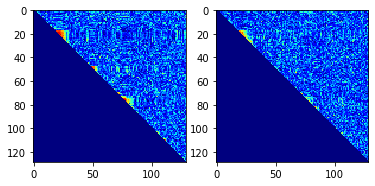

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(allcovsvv,vmin=0, vmax=1, cmap='jet',interpolation='nearest')
plt.subplot(1, 2, 2)
plt.imshow(allcovsvh,vmin=0, vmax=1, cmap='jet',interpolation='nearest')